# Circuitos Quânticos 2
Códigos utilizados na Seção `Circuitos Quânticos II` dos slides.

In [1]:
import qiskit
qiskit.__version__

'1.2.2'

In [67]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import visualize_transition, plot_distribution, plot_bloch_multivector, plot_histogram
from qiskit.providers.basic_provider import BasicSimulator
import numpy as np

# Exemplo 1

In [36]:
simulador = BasicSimulator()
# simulador.operations   # mostra todas as portas que funcionam no basicsimulator

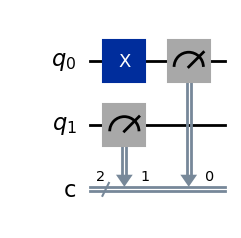

In [37]:
qubits = QuantumRegister(2,'q')
bits = ClassicalRegister(2,'c')

circ = QuantumCircuit(qubits, bits)

circ.x(qubits[0])
circ.measure(0,0)  # mede o qubit 0 no bit 0
circ.measure(1,1)  # mede o qubit 1 no bit 1

circ.draw("mpl")

In [31]:
# executar o simulador
job = simulador.run(circ, shots=10000)   # o shots é um número mágico
result = job.result()
print(result)

Result(backend_name='basic_simulator', backend_version='0.1', qobj_id='f37e483f-8f35-4473-8d9a-b27afcc153be', job_id='455a298b-21ec-4051-b436-bdd16f1b7e69', success=True, results=[ExperimentResult(shots=10000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 10000}), header=QobjExperimentHeader(qubit_labels=[['q', 0], ['q', 1]], n_qubits=2, qreg_sizes=[['q', 2]], clbit_labels=[['c', 0], ['c', 1]], memory_slots=2, creg_sizes=[['c', 2]], name='circuit-170', global_phase=0.0, metadata={}), status=DONE, name='circuit-170', seed_simulator=np.int32(1997738073), time_taken=0.015362024307250977)], date=None, status=COMPLETED, header=QobjHeader(backend_name='basic_simulator', backend_version='0.1'), time_taken=0.01550602912902832)


In [32]:
counts = result.get_counts()
print(counts)

{'01': 10000}


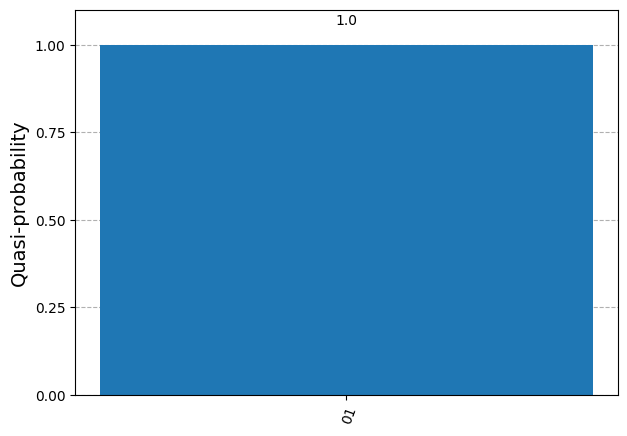

In [33]:
plot_distribution(counts)  # mostra a porcentagem

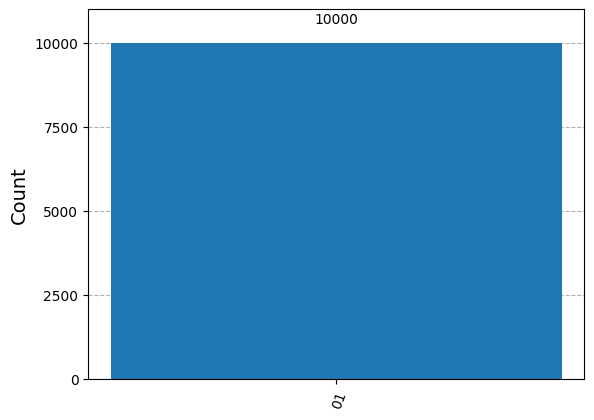

In [8]:
plot_histogram(counts)  # mostra a contagem

# Exemplo 2

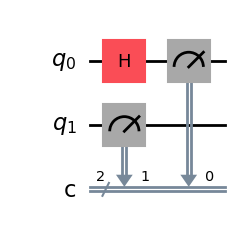

In [40]:
qubits = QuantumRegister(2,'q')
bits = ClassicalRegister(2,'c')

circ = QuantumCircuit(qubits, bits)

circ.h(qubits[0])
circ.measure(0,0)  # mede o qubit 0 no bit 0
circ.measure(1,1)  # mede o qubit 1 no bit 1

circ.draw("mpl")

{'01': 4976, '00': 5024}


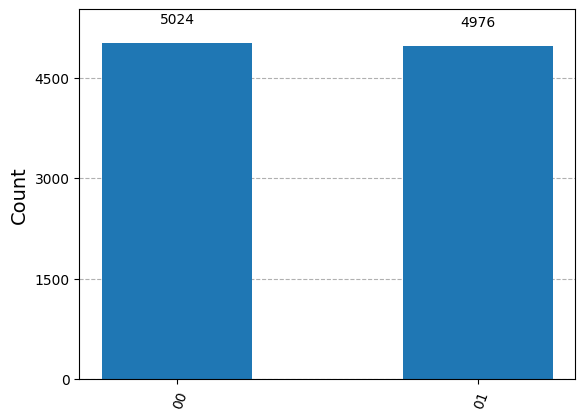

In [41]:
job = simulador.run(circ, shots=10000)   # o shots é um número mágico
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

# Exemplo 3
Nas versões mais antigas do qiskit, a porta RX não funcionava no BasicSimulator. Portanto, para evitar esse tipo de erro no BasicSimulator, bem como nos Computador Quânticos (pois cada um possui portas específicas) utiliza-se o `transpile` para garantir a execução do circuito. Sendo assim, o `transpile` garantirá a execução do circuito de qualquer forma, uma vez que ele automaticamente fará a otimização do circuito para funcionar no ambiente escolhido.

No exemplo abaixo, caso seja executado nas versões abaixo de 1.2.2, não será executado, caso não utilize o `transpile`.

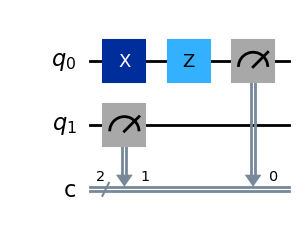

In [70]:
# importa o transpile
from qiskit import transpile

qubits = QuantumRegister(2,'q')
bits = ClassicalRegister(2,'c')
circ = QuantumCircuit(qubits, bits)

# circ.rx(np.pi/3 , qubits[0])
circ.x(qubits[0])
circ.z(qubits[0])
circ.measure(range(2), range(2))
circ.draw("mpl")

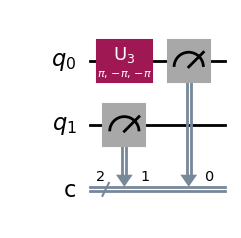

In [71]:
# transpilar o circuito
t_circ = transpile(circ, backend=simulador)
t_circ.draw("mpl")  # caso esteja na versão antiga ou o BasicSimulator não tenha as portas, será mostrado outro circuito diferente do de cima

{'01': 10000}


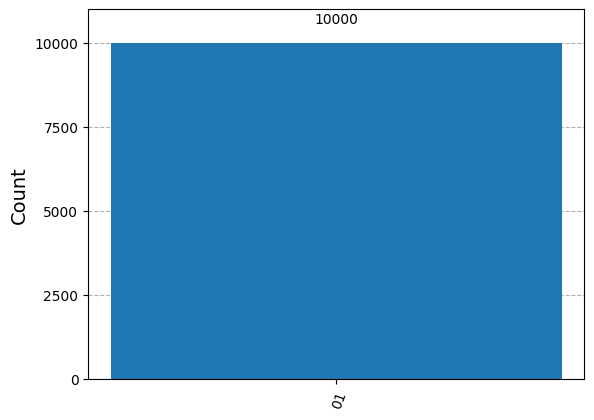

In [72]:
job = simulador.run(t_circ, shots=10000)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)